# Image Stitching Homework

**Submitted by:**  
  Saurabh Kumar  
  (SC22B146)

Welcome to the Image Stitching Homework assignment! In this notebook, you will work on stitching two images together using feature detection and matching techniques. This is a common task in computer vision and involves several key steps:

1. **Feature Extraction**: Detect key points and compute feature descriptors for both images.
2. **Feature Matching**: Match the features between the two images.
3. **Homography Estimation**: Calculate the transformation matrix to align the images.
4. **Image Stitching**: Warp and blend the images to create a panorama.

## Instructions

- You will find code cells with missing parts that you need to fill in. Follow the instructions provided in the comments to complete the code.
- Make sure to run each cell after completing it to verify your implementation.
- Use the provided functions and hints to guide your work.

## Objectives

By the end of this assignment, you should be able to:
- Understand and implement feature extraction and matching using OpenCV.
- Estimate homography and apply perspective transformations.
- Stitch images to create a seamless panorama.

Let's get started!


## Importing Libraries and Setting Up

In this section, we will import the necessary libraries and set up the environment for our image stitching task. We will also define the paths to the input images and ensure they exist before proceeding.

### Steps:
- Import essential libraries such as OpenCV, NumPy, Matplotlib, and others.
- Set the image ID and feature extraction method.
- Construct file paths for the images to be stitched.
- Verify the existence of the images to avoid runtime errors.

This setup is crucial for ensuring that the subsequent steps in the image stitching process can be executed smoothly.

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import imageio
import os
from PIL import Image
cv2.ocl.setUseOpenCL(False)

## Reading and Displaying Images

In this section, we will read the input images and display them using Matplotlib. This will help us visually verify the images we are working with.

### Steps:
- Read the images using OpenCV.
- Convert the images to RGB format for compatibility with Matplotlib.
- Convert the images to grayscale for feature detection.
- Display the images side by side for comparison.

By the end of this section, you should have a clear view of the images you will be stitching together.

In [111]:
# select the image id (valid values 1,2,3, or 4)
imageId = "paris_1"
feature_extractor = 'sift'
feature_matching = 'bf'

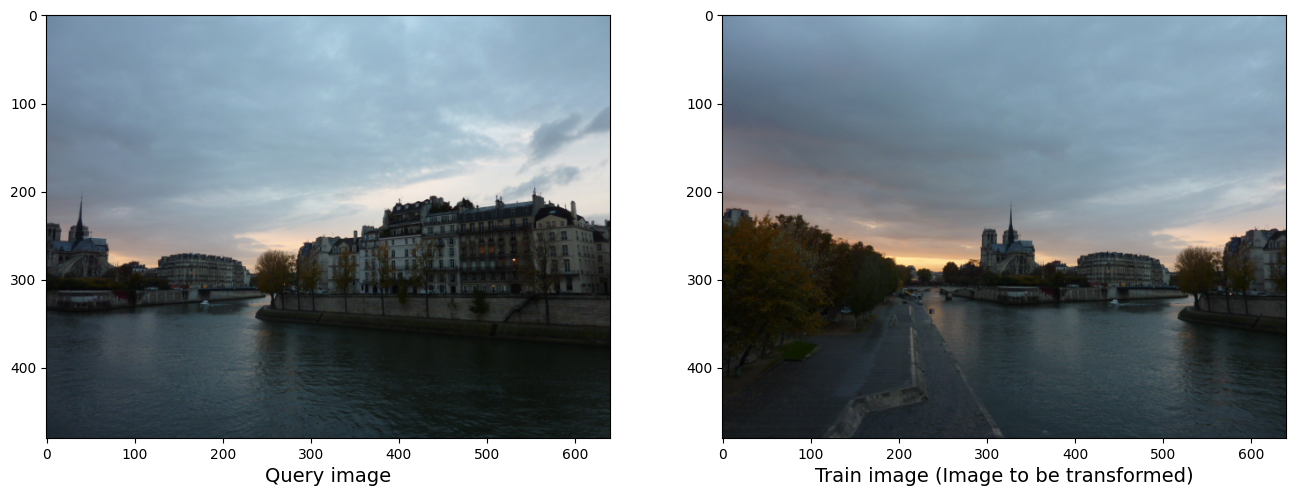

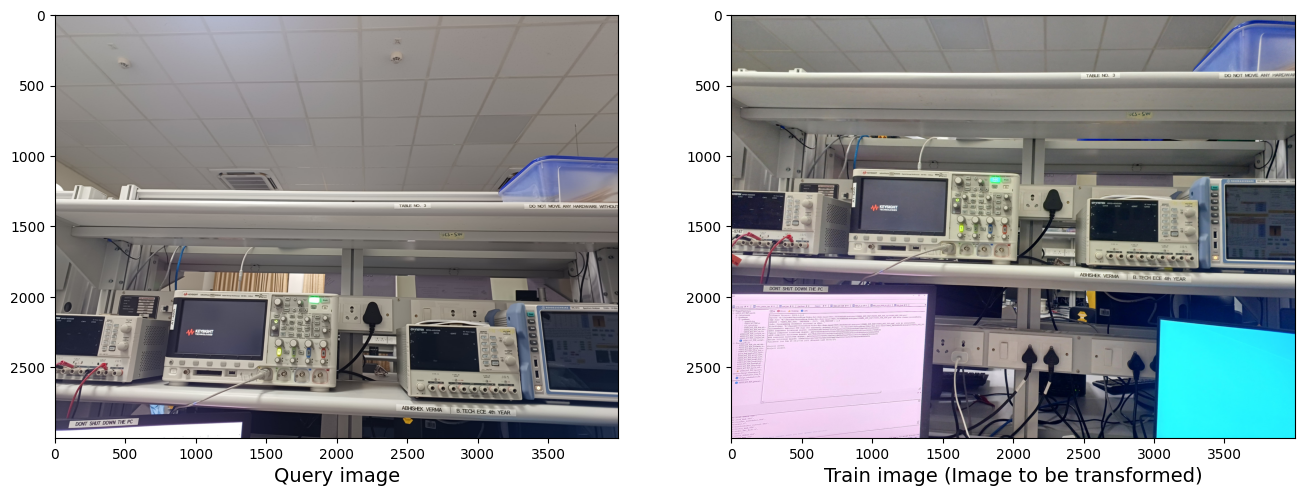

In [156]:
# Construct file paths 
train_path = f'./inputs/{imageId}a.jpg'
query_path = f'./inputs/{imageId}b.jpg'

# Check if images exist
if not os.path.exists(train_path):
    raise FileNotFoundError(f"Train image not found: {train_path}")
if not os.path.exists(query_path):
    raise FileNotFoundError(f"Query image not found: {query_path}")

# Read images
trainImg = cv2.imread(train_path)
queryImg = cv2.imread(query_path)

# Convert images to RGB for matplotlib compatibility
trainImg = cv2.cvtColor(trainImg, cv2.COLOR_BGR2RGB)
queryImg = cv2.cvtColor(queryImg, cv2.COLOR_BGR2RGB)

# Convert to grayscale
trainImg_gray = cv2.cvtColor(trainImg, cv2.COLOR_RGB2GRAY)
queryImg_gray = cv2.cvtColor(queryImg, cv2.COLOR_RGB2GRAY)

# Plot the images
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, constrained_layout=False, figsize=(16,9))
ax1.imshow(queryImg, cmap="gray")
ax1.set_xlabel("Query image", fontsize=14)

ax2.imshow(trainImg, cmap="gray")
ax2.set_xlabel("Train image (Image to be transformed)", fontsize=14)

# Save the figure
# Define the output directory and file path
output_dir = "./output"
output_path = f"{output_dir}/input_img_{imageId}.jpeg"

# Create the directory if it doesn't exist
os.makedirs(output_dir, exist_ok=True)
plt.savefig(output_path, bbox_inches='tight', dpi=300, format='jpeg')

# Open and optimize using Pillow
image = Image.open(output_path)
image.save(output_path, "JPEG", optimize=True, quality=85)  # Adjust quality if needed

# Show the images
plt.show()

# for vetical panaroma images
# Construct file paths 
train_path_lab = f'./inputs/lab2.jpg'
query_path_lab = f'./inputs/lab1.jpg'

# Check if images exist
if not os.path.exists(train_path_lab):
    raise FileNotFoundError(f"Train image not found: {train_path_lab}")
if not os.path.exists(query_path_lab):
    raise FileNotFoundError(f"Query image not found: {query_path_lab}")

# Read images
trainImgLab = cv2.imread(train_path_lab)
queryImgLab = cv2.imread(query_path_lab)

# Convert images to RGB for matplotlib compatibility
trainImgLab = cv2.cvtColor(trainImgLab, cv2.COLOR_BGR2RGB)
queryImgLab = cv2.cvtColor(queryImgLab, cv2.COLOR_BGR2RGB)

# Convert to grayscale
trainImgLab_gray = cv2.cvtColor(trainImgLab, cv2.COLOR_RGB2GRAY)
queryImgLab_gray = cv2.cvtColor(queryImgLab, cv2.COLOR_RGB2GRAY)

# Plot the images
fig2, (ax3, ax4) = plt.subplots(nrows=1, ncols=2, constrained_layout=False, figsize=(16,9))
ax3.imshow(queryImgLab, cmap="gray")
ax3.set_xlabel("Query image", fontsize=14)

ax4.imshow(trainImgLab, cmap="gray")
ax4.set_xlabel("Train image (Image to be transformed)", fontsize=14)

# Show the images
plt.show()

## Exercise: Feature Detection and Description

In this exercise, you will implement the `detectAndDescribe` function, which is responsible for detecting key points and computing feature descriptors for a given image. This is a crucial step in the image stitching process, as it allows us to identify and match features between images.

### Function Overview:
- **Input**: An image and a specified feature detection method (e.g., SIFT, SURF, BRISK, ORB).
- **Output**: Key points and feature descriptors for the image.

### Steps:
1. **Select Feature Detection Method**: Choose from SIFT, SURF, BRISK, or ORB based on the method parameter.
2. **Detect Key Points**: Identify distinctive points in the image that can be used for matching.
3. **Compute Descriptors**: Generate a set of feature descriptors that describe the local image patches around each key point.

### Instructions:
- Fill in the missing parts of the `detectAndDescribe` function.
- Use the provided hints to guide your implementation.

By the end of this exercise, you will have a set of key points and descriptors that can be used to match features between images, facilitating the homography estimation and image stitching process.

In [157]:
def detectAndDescribe(image, method=None):
    """
    Compute key points and feature descriptors using a specific method
    """
    
    assert method is not None, "You need to define a feature detection method. Values are: 'sift', 'surf', 'brisk', 'orb'"
    
    # Initialize the descriptor based on the method
    if method == 'sift':
        descriptor = cv2.SIFT_create()
    elif method == 'surf':
        descriptor = cv2.SURF_create()
    elif method == 'brisk':
        descriptor = cv2.BRISK_create()
    elif method == 'orb':
        descriptor = cv2.ORB_create()
    
    # Detect keypoints and compute descriptors
    # HINT: Use the detectAndCompute method of the descriptor
    (kps, features) = descriptor.detectAndCompute(image, None)
    
    return (kps, features)

# Test the function with the provided images
kpsA, featuresA = detectAndDescribe(trainImg_gray, method=feature_extractor)
kpsB, featuresB = detectAndDescribe(queryImg_gray, method=feature_extractor)

# For vetical panorama
kpsLA, featuresLA = detectAndDescribe(trainImgLab_gray, method=feature_extractor)
kpsLB, featuresLB = detectAndDescribe(queryImgLab_gray, method=feature_extractor)

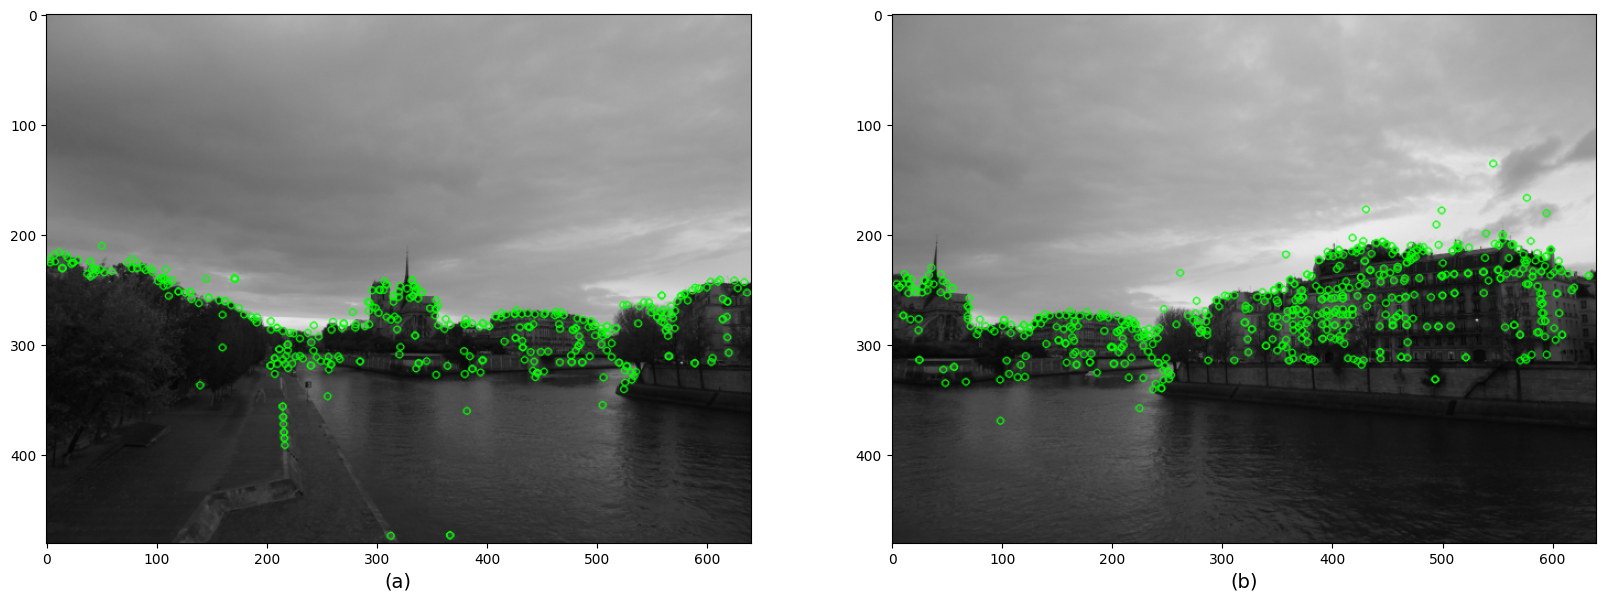

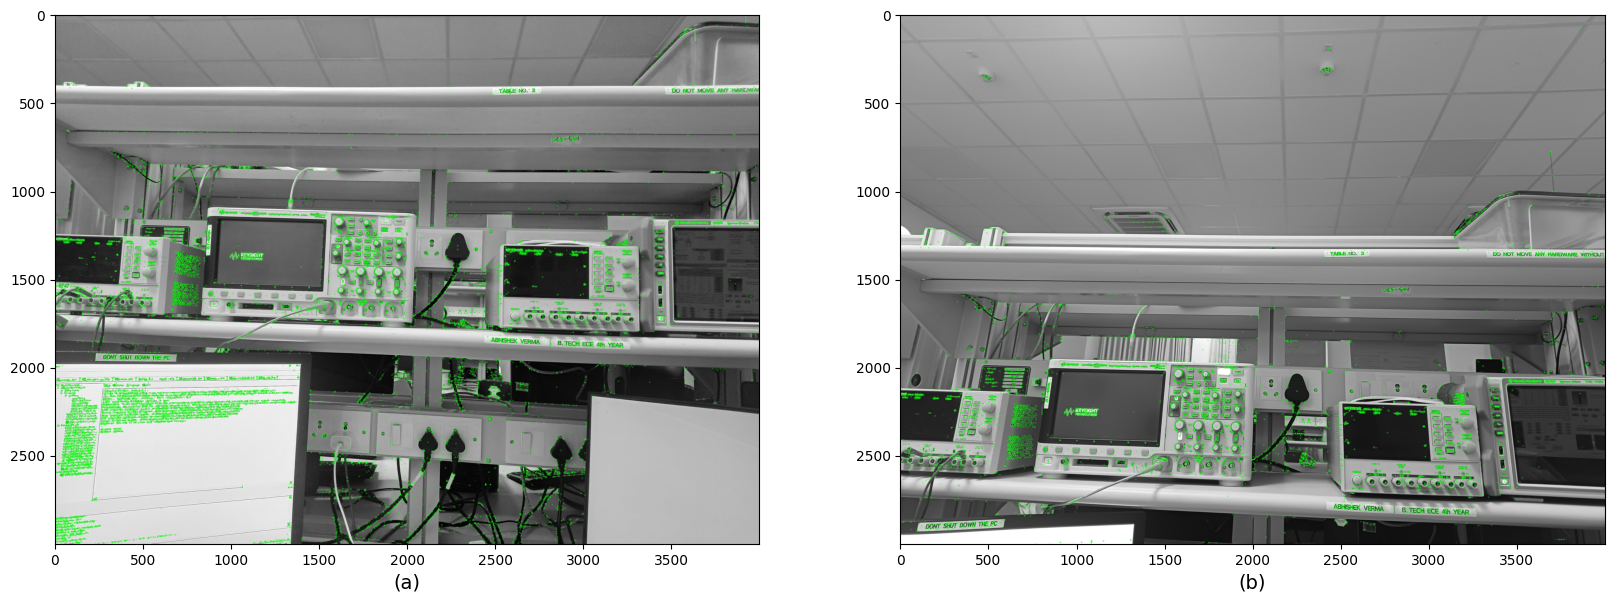

In [177]:
# display the keypoints and features detected on both images
fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20,8), constrained_layout=False)
ax1.imshow(cv2.drawKeypoints(trainImg_gray,kpsA,None,color=(0,255,0)))
ax1.set_xlabel("(a)", fontsize=14)
ax2.imshow(cv2.drawKeypoints(queryImg_gray,kpsB,None,color=(0,255,0)))
ax2.set_xlabel("(b)", fontsize=14)

# Define output path
output_path = os.path.join(output_dir, f"{feature_extractor}_features_img_{imageId}.jpeg")

# Save using Matplotlib (without optimize)
plt.savefig(output_path, bbox_inches='tight', dpi=300, format='jpeg')

# Optimize using Pillow
image = Image.open(output_path)
image.save(output_path, "JPEG", optimize=True, quality=85)  # Adjust quality if needed

# Show the plot
plt.show()

# for vertical panaroama images
# display the keypoints and features detected on both images
fig2, (ax3,ax4) = plt.subplots(nrows=1, ncols=2, figsize=(20,8), constrained_layout=False)
ax3.imshow(cv2.drawKeypoints(trainImgLab_gray,kpsLA,None,color=(0,255,0)))
ax3.set_xlabel("(a)", fontsize=14)
ax4.imshow(cv2.drawKeypoints(queryImgLab_gray,kpsLB,None,color=(0,255,0)))
ax4.set_xlabel("(b)", fontsize=14)

# Show the plot
plt.show()

## Exercise: Feature Matching

In this section, we'll implement three important functions for feature matching: `createMatcher`, `matchKeyPointsBF`, and `matchKeyPointsKNN`. These functions are crucial for finding correspondences between features in different images.

### Exercise 1: Create Matcher

Implement the `createMatcher` function, which creates and returns a Matcher object based on the specified method.


In [178]:
import cv2

def createMatcher(method, crossCheck):
    """
    Create and return a Matcher Object
    
    :param method: The feature detection method used ('sift', 'surf', 'orb', or 'brisk')
    :param crossCheck: Boolean indicating whether to use cross-checking in matching
    :return: A matcher object
    """
    # Your code here
    # Hint: Use cv2.BFMatcher with appropriate norm type based on the method
    if method == 'sift' or method == 'surf':
        norm = cv2.NORM_L2
    elif method == 'orb' or method == 'brisk':
        norm = cv2.NORM_HAMMING
    else:
        raise ValueError(f"Feature extraction method {method} not supported.")
    
    bf = cv2.BFMatcher(norm, crossCheck=crossCheck)

    return bf

# Test your implementation
test_matcher = createMatcher('sift', True)
print(type(test_matcher))

<class 'cv2.BFMatcher'>


### Exercise 2: Match Keypoints (Brute Force)
Implement the `matchKeyPointsBF` function, which matches keypoints using brute force matching.

In [179]:
def matchKeyPointsBF(featuresA, featuresB, method):
    """
    Perform brute force matching of features
    
    :param featuresA: Features from the first image
    :param featuresB: Features from the second image
    :param method: The feature detection method used
    :return: List of matches
    """
    # Your code here
    # Hint: Use the createMatcher function and then match the descriptors
    bf = createMatcher(method, crossCheck=True)
    matches = bf.match(featuresA, featuresB)

    return matches


# Test your implementation
matches = matchKeyPointsBF(featuresA, featuresB, feature_extractor)
print(f"Number of matches: {len(matches)}")

# for vertical panorama
matches_Lab = matchKeyPointsBF(featuresLA, featuresLB, feature_extractor)
print(f"Number of matches for vertical panaroma: {len(matches_Lab)}")

Number of matches: 204
Number of matches for vertical panaroma: 4610


### Exercise 3: Match Keypoints (KNN)
Implement the `matchKeyPointsKNN` function, which matches keypoints using K-Nearest Neighbors.

In [180]:
def matchKeyPointsKNN(featuresA, featuresB, ratio, method):
    """
    Perform KNN matching of features
    
    :param featuresA: Features from the first image
    :param featuresB: Features from the second image
    :param ratio: Ratio test threshold
    :param method: The feature detection method used
    :return: List of good matches
    """
    # Your code here
    # Hint: Use the createMatcher function, perform KNN matching, and apply ratio test
    bf = createMatcher(method, crossCheck=False)

    knn_matches = bf.knnMatch(featuresA, featuresB, k=2)

    good_matches = [m for m, n in knn_matches if m.distance < ratio * n.distance]
       
    return good_matches

# Test your implementation
good_matches = matchKeyPointsKNN(featuresA, featuresB, 0.75, feature_extractor)
print(f"Number of good matches: {len(good_matches)}")

# for vertical panorama
good_matches_lab = matchKeyPointsKNN(featuresLA, featuresLB, 0.75, feature_extractor)

Number of good matches: 145


### Visualizing the Matches
After implementing these functions, you can use the following code to visualize the matches:

Using: bf feature matcher


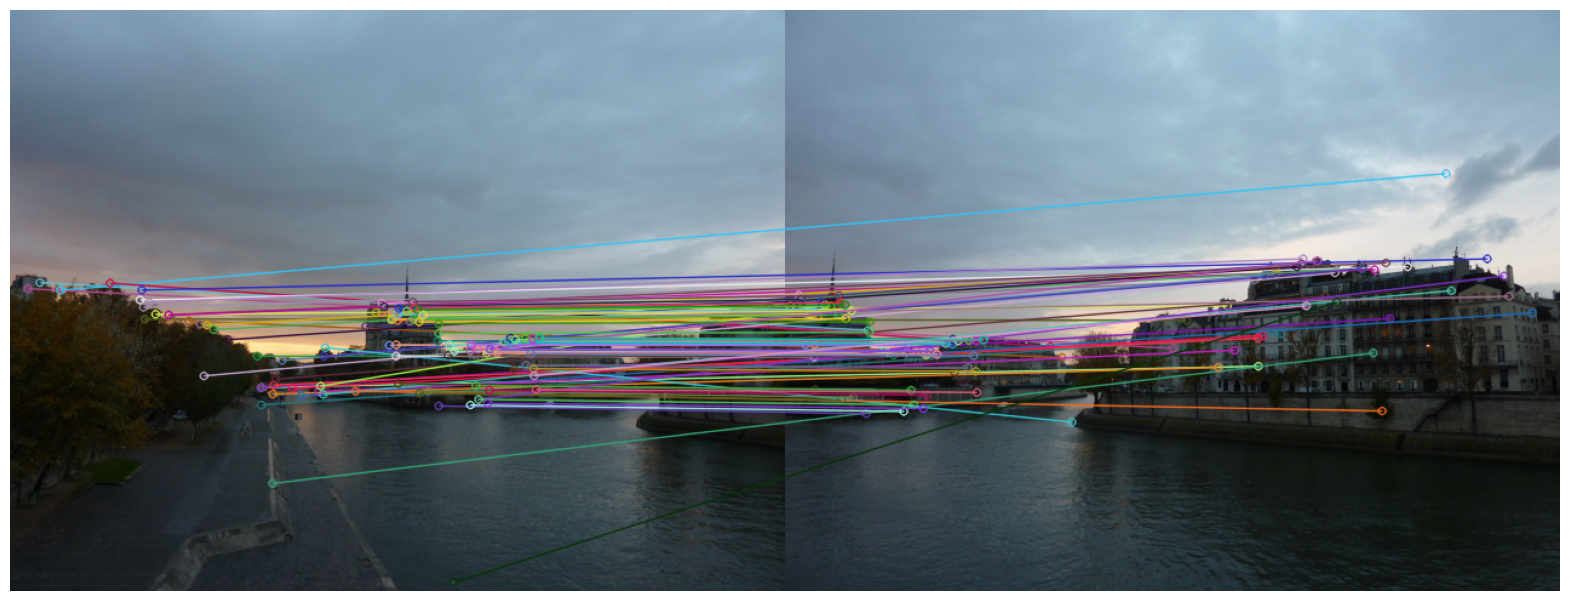

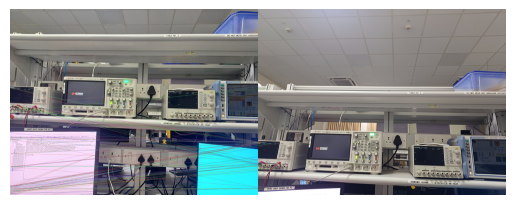

In [184]:
print("Using: {} feature matcher".format(feature_matching))

fig = plt.figure(figsize=(20,8))

if feature_matching == 'bf':
    matches = matchKeyPointsBF(featuresA, featuresB, method=feature_extractor)
    img3 = cv2.drawMatches(trainImg,kpsA,queryImg,kpsB,matches[:100],
                           None,flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
    
    # for vertical panorama
    matches_lab = matchKeyPointsBF(featuresLA, featuresLB, method=feature_extractor)
    img3_lab = cv2.drawMatches(trainImgLab,kpsLA,queryImgLab,kpsLB,matches[:100],
                           None,flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
    

elif feature_matching == 'knn':
    matches = matchKeyPointsKNN(featuresA, featuresB, ratio=0.75, method=feature_extractor)
    img3 = cv2.drawMatches(trainImg,kpsA,queryImg,kpsB,np.random.choice(matches,100),
                           None,flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
    
    # for vertical panorama
    matches_lab = matchKeyPointsKNN(featuresLA, featuresLB, ratio=0.75, method=feature_extractor)
    img3_lab = cv2.drawMatches(trainImgLab,kpsLA,queryImgLab,kpsLB,np.random.choice(matches,100),
                           None,flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

plt.imshow(img3)
plt.axis('off')
# Define output path
output_path = os.path.join(output_dir, f"{feature_matching}_matching_img_{imageId}.jpeg")

# Save using Matplotlib (without optimize)
plt.savefig(output_path, bbox_inches='tight', dpi=300, format='jpeg')

# Optimize using Pillow
image = Image.open(output_path)
image.save(output_path, "JPEG", optimize=True, quality=85)  # Adjust quality if needed

# Show the image
plt.show()

# for vertical panorama
plt.imshow(img3_lab)
plt.axis('off')
# Show the image
plt.show()

## Exercise: Homography Estimation

In this exercise, you will implement the `getHomography` function, which is crucial for estimating the transformation between two images. This function will use the matched keypoints to calculate the homography matrix.

### Function Overview:
- **Input**: Keypoints from both images and their matches.
- **Output**: Homography matrix and status of each match.

### Instructions:
- Implement the `getHomography` function using OpenCV's `findHomography` method.
- Use RANSAC algorithm for robust estimation.
- Return both the homography matrix and the status of matches.


In [185]:
def getHomography(kpsA, kpsB, featuresA, featuresB, matches, reprojThresh):
    # Convert keypoints to numpy arrays
    kpsA = np.float32([kp.pt for kp in kpsA])
    kpsB = np.float32([kp.pt for kp in kpsB])
    
    if len(matches) > 4:
        # Construct the two sets of points
        ptsA = np.float32([kpsA[m.queryIdx] for m in matches])
        ptsB = np.float32([kpsB[m.trainIdx] for m in matches])
        
        # Estimate the homography between the sets of points
        # YOUR CODE HERE
        # Hint: Use cv2.findHomography with RANSAC
        H, status = cv2.findHomography(ptsA, ptsB, cv2.RANSAC, reprojThresh)
        
        return (matches, H, status)
    else:
        return None

In [186]:
M = getHomography(kpsA, kpsB, featuresA, featuresB, matches, reprojThresh=4)
if M is None:
    print("Error!")
(matches, H, status) = M
print(H)

# for vertical panorama
M_Lab = getHomography(kpsLA, kpsLB, featuresLA, featuresLB, matches_Lab, reprojThresh=4)
if M_Lab is None:
    print("Error!")
(matches_Lab, H_Lab, status_Lab) = M_Lab

[[ 2.06228700e+00 -1.04578380e-01 -5.91588913e+02]
 [ 4.96175121e-01  1.73306424e+00 -2.18559341e+02]
 [ 1.69912663e-03 -9.03281546e-05  1.00000000e+00]]


## Exercise: Creating Horizontal Panorama

In this exercise, you will implement the code to create a horizontal panorama by stitching two images side by side.

### Steps:
1. Calculate the dimensions of the panorama.
2. Create a blank canvas for the panorama.
3. Warp the second image onto the panorama canvas using the homography matrix.
4. Blend the first image with the warped second image.

### Instructions:
- Use the provided homography matrix to warp the second image.
- Implement proper blending of the two images.
- Ensure the panorama includes all parts of both images.


In [187]:
# Your code here
# Hint: Use cv2.warpPerspective for warping and np.maximum for blending
import cv2
import numpy as np
import matplotlib.pyplot as plt

# function to create a panorama
def create_panorama(img2, img1, H):
    h1, w1 = img1.shape[:2]
    h2, w2 = img2.shape[:2]

    # calculate the corners of img2
    corners_img2 = np.float32([[0, 0], [0, h2], [w2, 0], [w2, h2]]).reshape(-1, 1, 2)
    warped_corners = cv2.perspectiveTransform(corners_img2, H)

    # size of the output panorama
    min_x = min(0, warped_corners[:, 0, 0].min())
    max_x = max(w1, warped_corners[:, 0, 0].max())
    min_y = min(0, warped_corners[:, 0, 1].min())
    max_y = max(h1, warped_corners[:, 0, 1].max())

    new_width = int(max_x - min_x)
    new_height = int(max_y - min_y)

    # shift the panorama into positive coordinates
    translation_matrix = np.array([[1, 0, -min_x], [0, 1, -min_y], [0, 0, 1]])

    # warp second image into the panorama frame
    warped_img2 = cv2.warpPerspective(img2, translation_matrix @ H, (new_width, new_height))

    # blank panorama canvas
    panorama = np.zeros((new_height, new_width, 3), dtype=np.uint8)

    # place the first image onto the panorama
    panorama[-int(min_y):h1-int(min_y), -int(min_x):w1-int(min_x)] = img1

    # blend the images using np.maximum
    panorama = np.maximum(panorama, warped_img2)

    return panorama

# Create panorama
result = create_panorama(trainImg, queryImg, H)

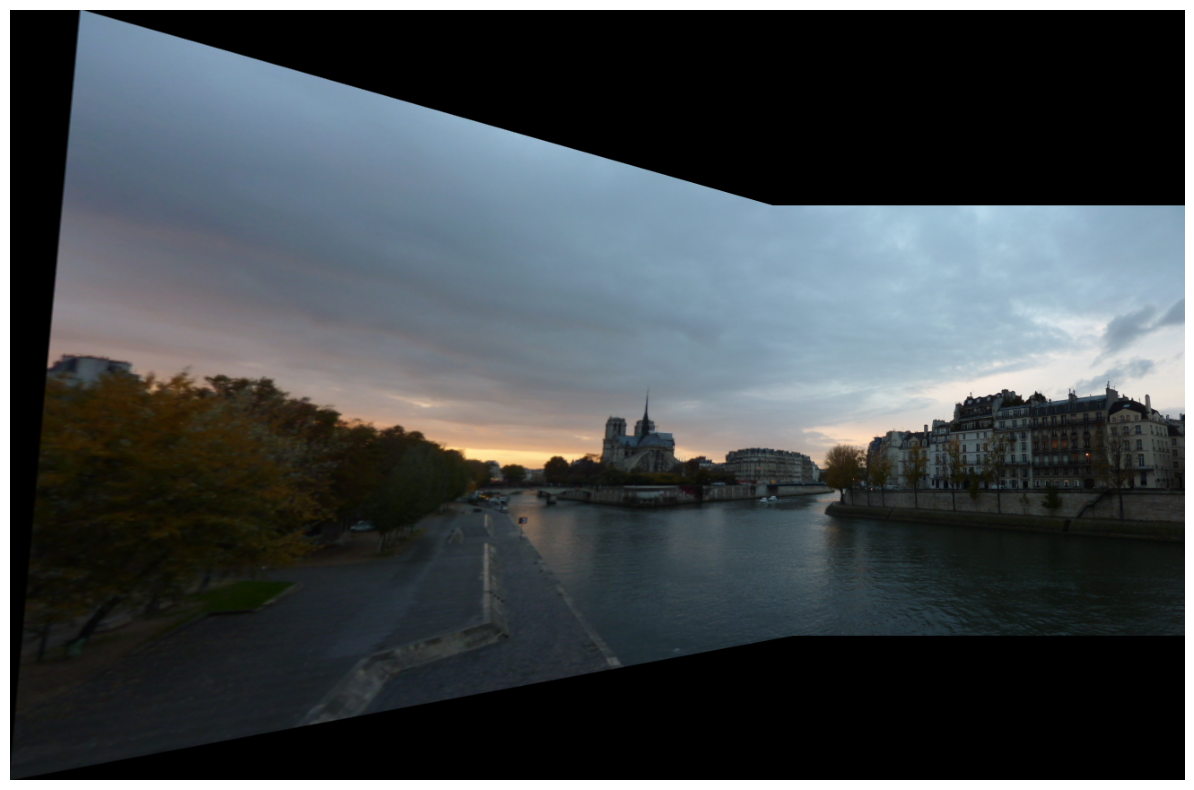

In [188]:
plt.figure(figsize=(20, 10))
plt.axis("off")
plt.imshow(result)
plt.show()


imageio.imwrite("./output/horizontal_panorama_img_"+str(imageId)+'.jpeg', result)
plt.show()

## Exercise: Creating Vertical Panorama

Similar to the horizontal panorama, in this exercise you will implement the code to create a vertical panorama by stacking two images.

### Steps:
1. Calculate the dimensions of the vertical panorama.
2. Create a blank canvas for the panorama.
3. Warp the second image onto the panorama canvas using the homography matrix.
4. Stack the first image on top of the warped second image.

### Instructions:
- Adapt the horizontal panorama code to work for vertical stacking.
- Ensure proper alignment and blending of the two images.


In [189]:
# Your code here
# Hint: The process is similar to horizontal panorama, but with different dimension calculations

# function to create a vertical panorama
def create_vertical_panorama(img1, img2, H):
    h1, w1 = img1.shape[:2]
    h2, w2 = img2.shape[:2]

    # Transform the corners of the second image (img2)
    corners_img2 = np.float32([[0, 0], [w2, 0], [0, h2], [w2, h2]]).reshape(-1, 1, 2)
    warped_corners = cv2.perspectiveTransform(corners_img2, H)

    # Compute the new vertical boundaries
    min_x = min(0, warped_corners[:, 0, 0].min())
    max_x = max(w1, warped_corners[:, 0, 0].max())
    min_y = min(0, warped_corners[:, 0, 1].min())
    max_y = max(h1, warped_corners[:, 0, 1].max())

    new_width = int(max_x - min_x)
    new_height = int(max_y - min_y)

    # Translation matrix to shift everything into the new canvas
    translation_matrix = np.array([[1, 0, -min_x], [0, 1, -min_y], [0, 0, 1]])

    # Warp the second image onto the panorama frame
    warped_img2 = cv2.warpPerspective(img2, translation_matrix @ H, (new_width, new_height))

    # Create blank canvas
    panorama = np.zeros((new_height, new_width, 3), dtype=np.uint8)

    # Place the first image (bottom image) correctly in the new canvas
    x_offset = int(-min_x)
    y_offset = int(-min_y)
    panorama[y_offset:y_offset + h1, x_offset:x_offset + w1] = img1

    # Blend images using np.maximum
    blended_panorama = np.maximum(panorama, warped_img2)

    return blended_panorama

result_vertical = create_vertical_panorama(queryImgLab, trainImgLab, H_Lab)


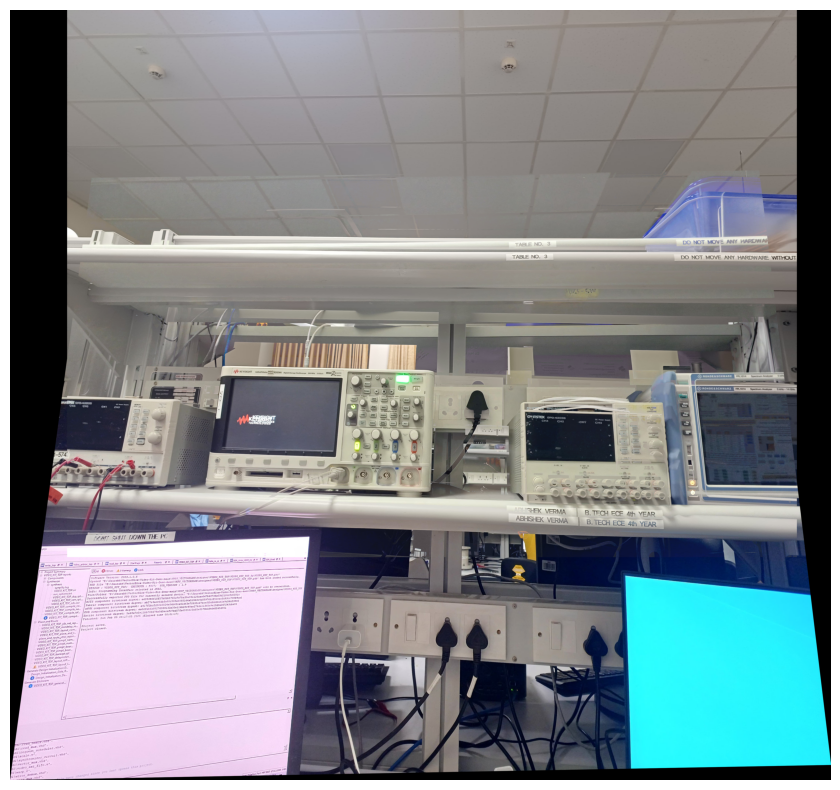

In [190]:
plt.figure(figsize=(20,10))
plt.imshow(result_vertical)

imageio.imwrite("./output/vertical_panorama_img_lab_"+'.jpeg', result_vertical)

plt.axis('off')
plt.show()

By completing these exercises, you will have implemented the key components of an image stitching pipeline, including homography estimation and panorama creation for both horizontal and vertical alignments.